In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [463]:
# libraries for  Preprossing, ML & DL Model/ algo
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM, Input

from sklearn.metrics import classification_report

In [465]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [469]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

C:\Users\ASMIT SRIVASTAVA\AppData\Local\Temp\ipykernel_3224\3512591869.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["DEATH_EVENT"], palette=["#00FF00","#FF0000"])


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

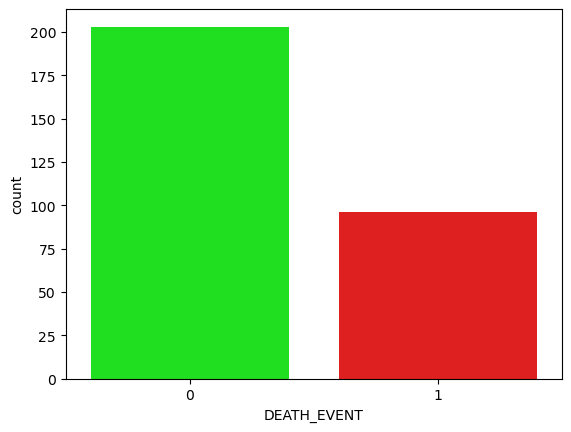

In [471]:
sns.countplot(x=data["DEATH_EVENT"], palette=["#00FF00","#FF0000"])

In [633]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


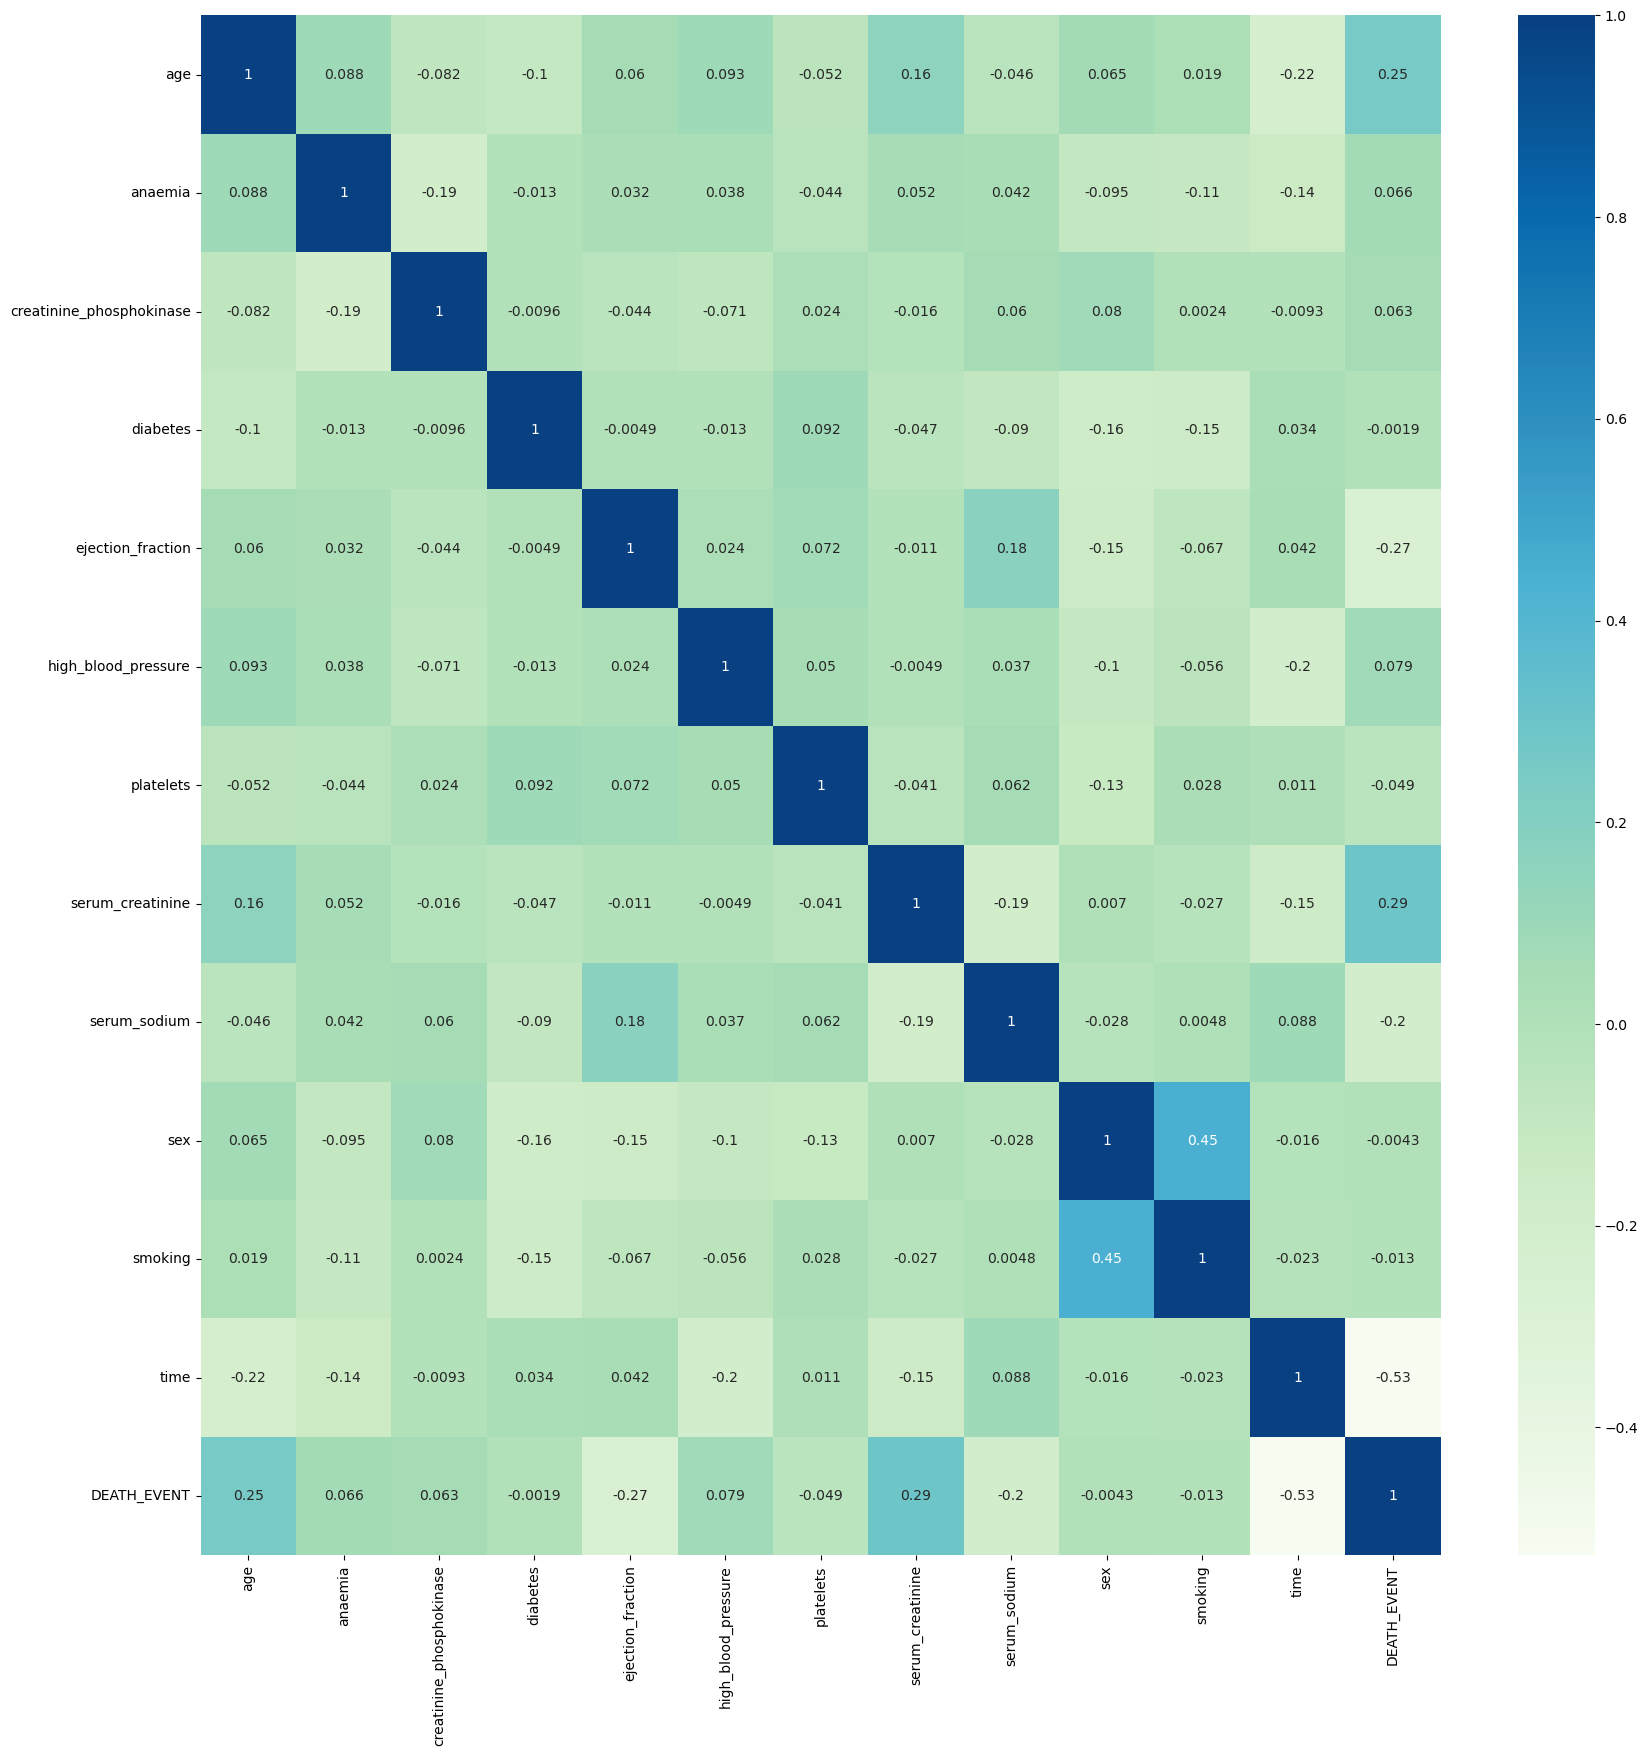

In [751]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = "GnBu")
plt.show()

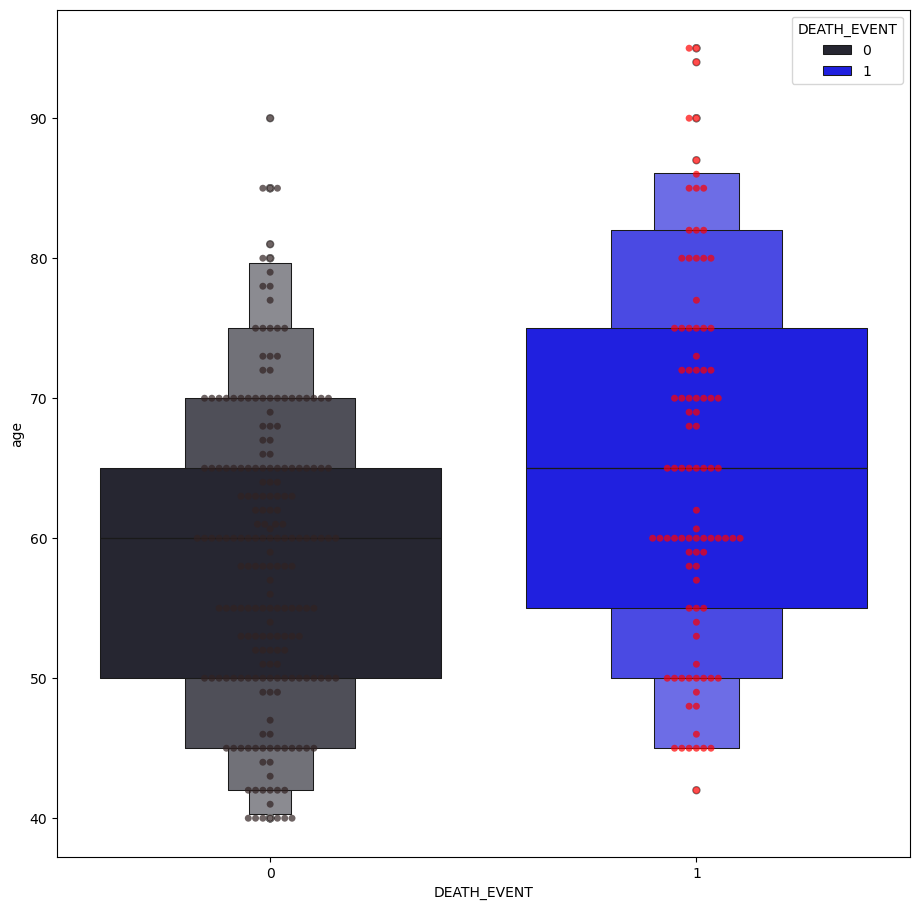

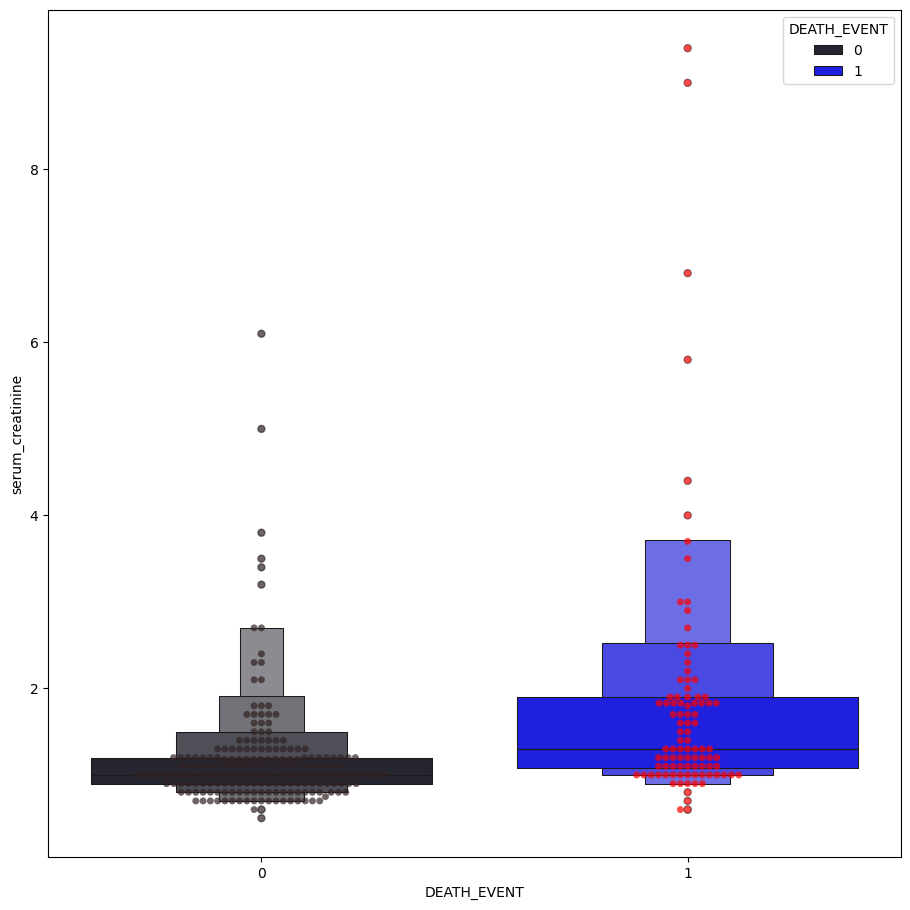

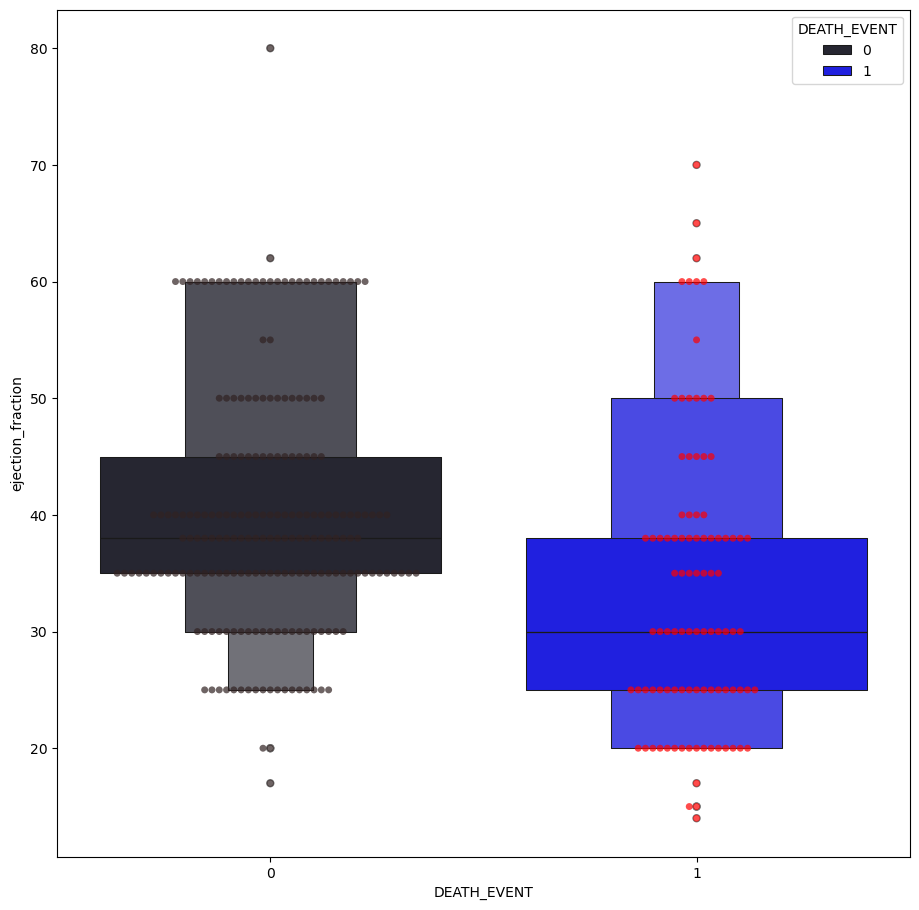

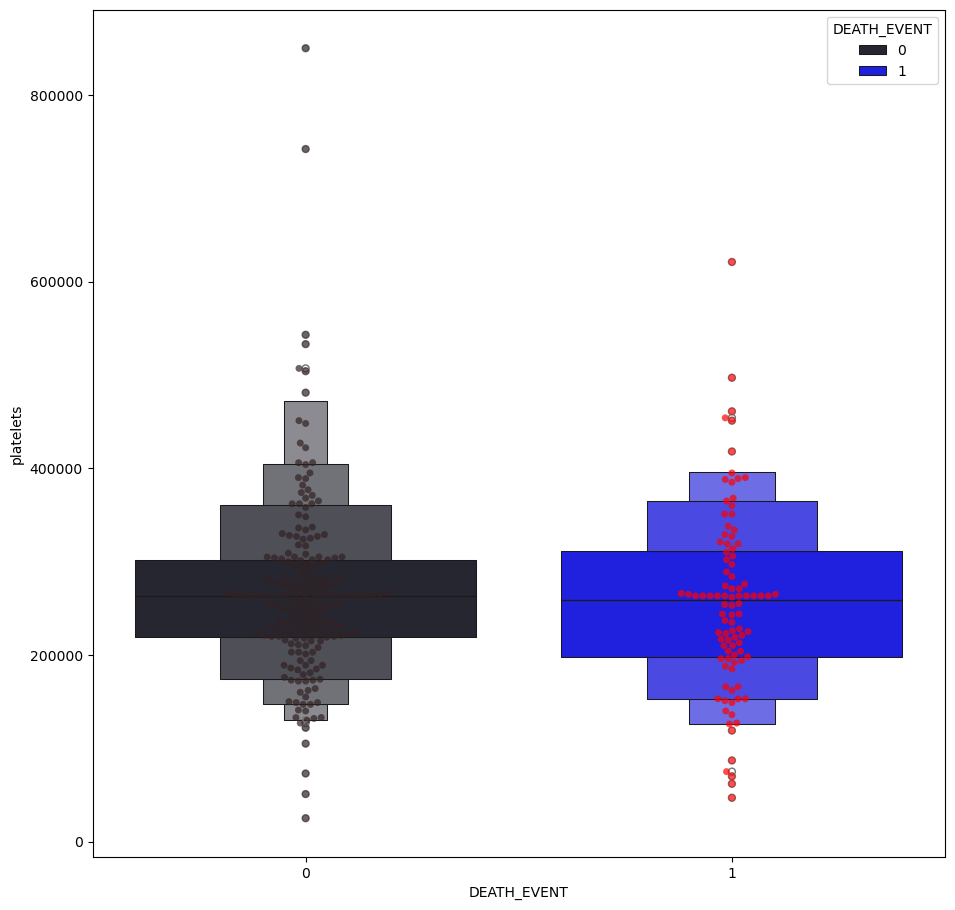

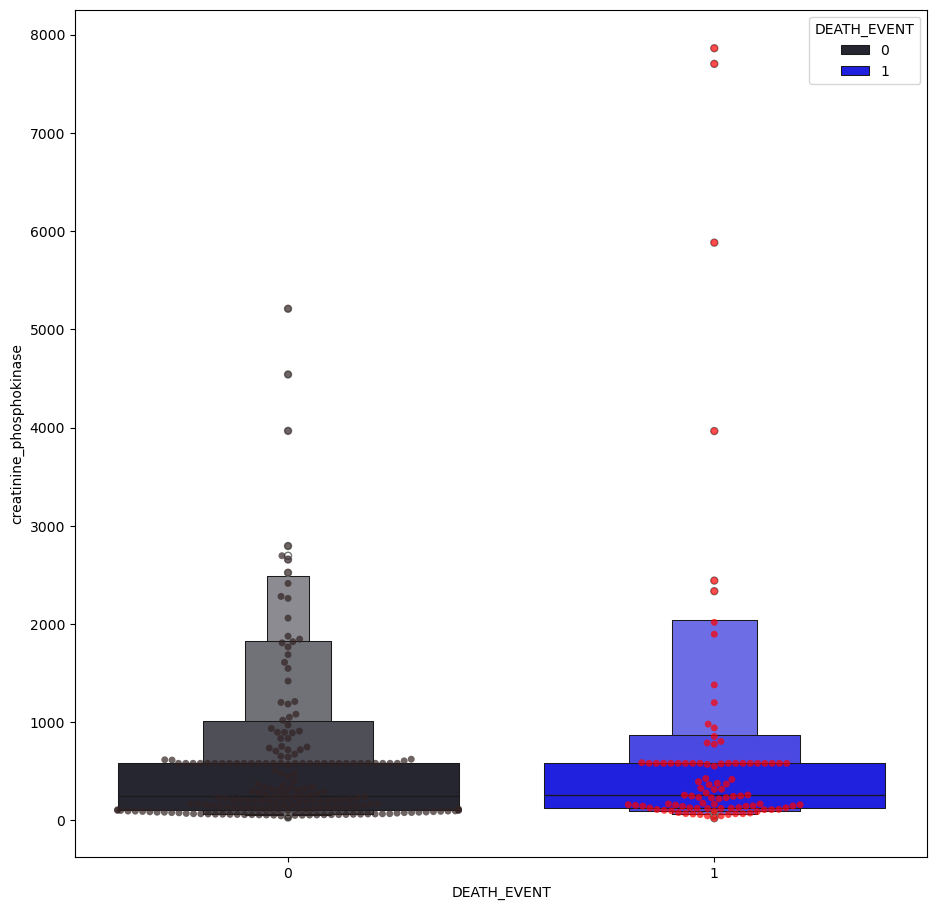

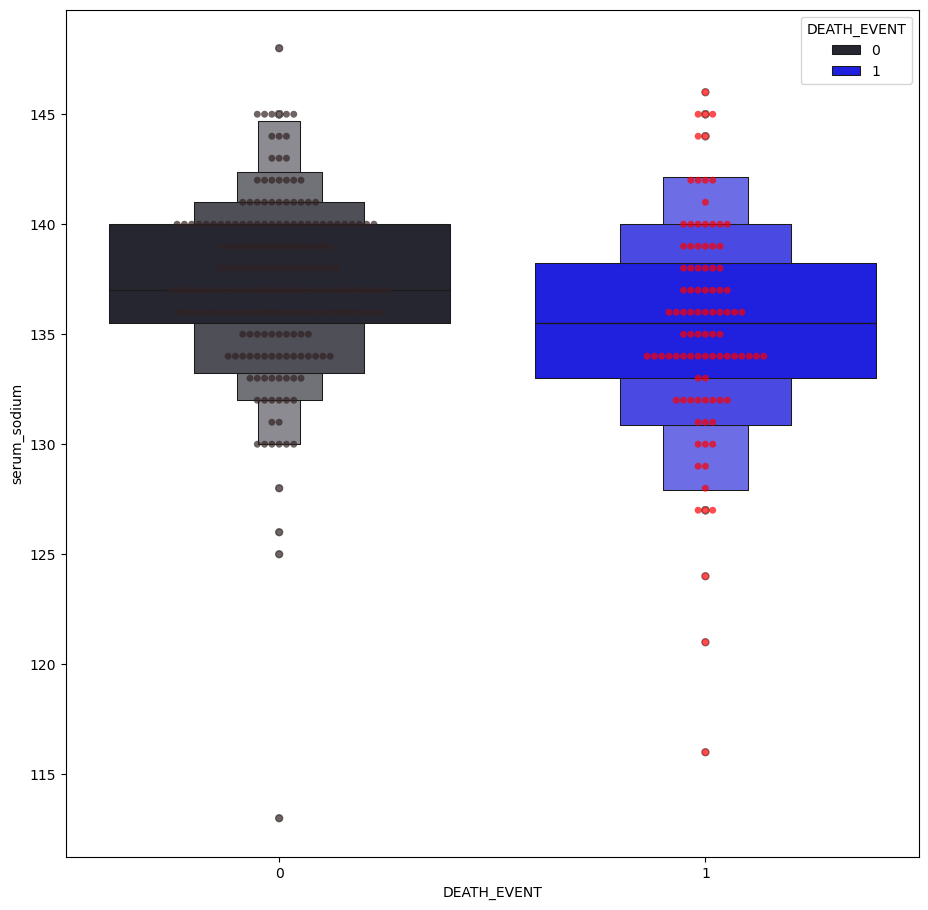

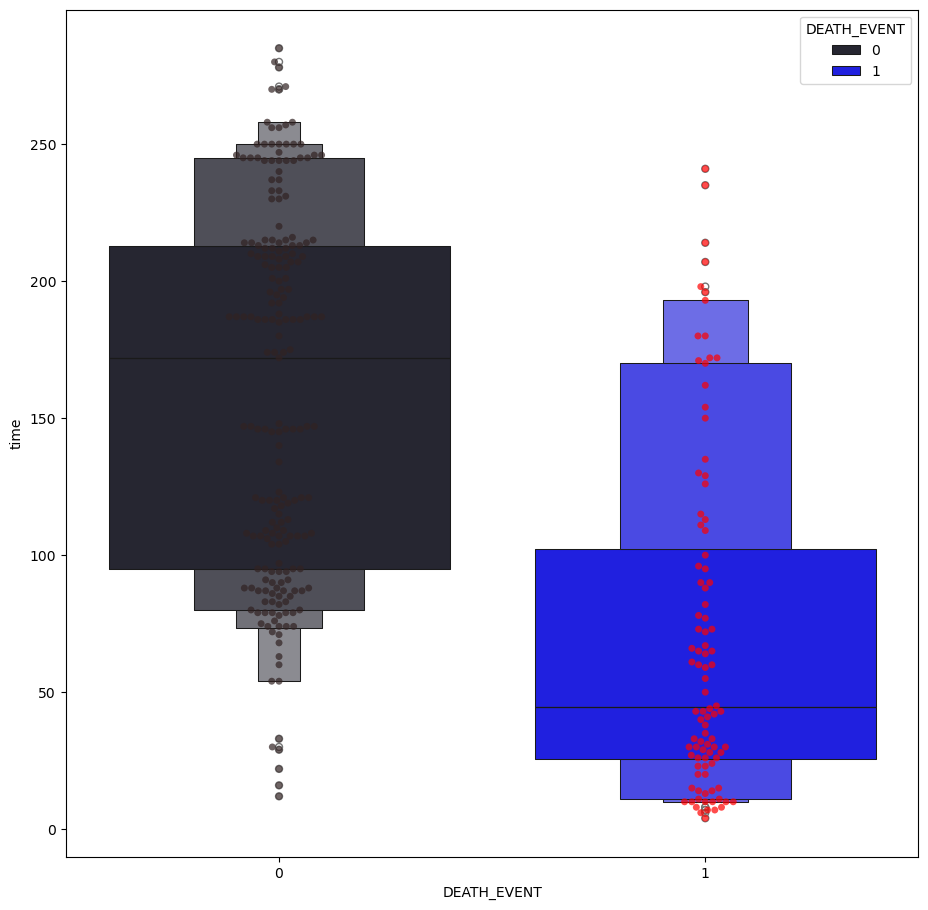

In [808]:
features = ["age", "serum_creatinine", "ejection_fraction", "platelets", "creatinine_phosphokinase", "serum_sodium", "time",]

for feature in features:
    plt.figure(figsize=(11, 11))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[feature], hue=data["DEATH_EVENT"], palette='dark:red', alpha=0.7, legend=False)
    sns.boxenplot(x=data["DEATH_EVENT"], y=data[feature], hue=data["DEATH_EVENT"], palette='dark:blue' )
   

In [810]:
x = data.drop(["DEATH_EVENT"], axis=1)
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [812]:
ss = StandardScaler()
cols = list(x.columns)
X_scaled = ss.fit_transform(x)
x_scaled = pd.DataFrame(X_scaled, columns=cols)

In [814]:
X_scaled

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [993]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.5)

In [995]:
model1 = svm.SVC()

In [997]:
model1.fit(x_train, y_train)

SVC()

In [999]:
y_pred1 = model1.predict(x_test)

In [1001]:
y_pred1

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [1003]:
y_test

154    0
100    0
101    0
278    0
254    0
      ..
25     1
151    0
98     0
135    0
19     1
Name: DEATH_EVENT, Length: 150, dtype: int64

In [1005]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        91
           1       0.82      0.47      0.60        59

    accuracy                           0.75       150
   macro avg       0.78      0.70      0.71       150
weighted avg       0.77      0.75      0.74       150



In [1007]:
model = Sequential([ 
    Input(shape=(12,)),  # Define the input shape here
    Dense(units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dropout(0.25),
    Dense(units=8, activation='relu'),
    Dropout(0.25),
    Dense(units=1, activation='sigmoid')  
])

In [1009]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [1011]:
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,017 (7.88 KB)

 Trainable params: 2,017 (7.88 KB)

 Non-trainable params: 0 (0.00 B)

In [1013]:
history = model.fit(x_train, y_train,batch_size=25, epochs=25, validation_split=0.25)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4462 - loss: 0.7128 - val_accuracy: 0.6053 - val_loss: 0.6867
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6508 - loss: 0.6437 - val_accuracy: 0.7105 - val_loss: 0.6614
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6409 - loss: 0.6261 - val_accuracy: 0.6842 - val_loss: 0.6429
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6741 - loss: 0.6018 - val_accuracy: 0.6842 - val_loss: 0.6255
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7500 - loss: 0.5807 - val_accuracy: 0.6842 - val_loss: 0.6090
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7775 - loss: 0.5283 - val_accuracy: 0.6842 - val_loss: 0.5934
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7606 - loss: 0.5549 - val_accuracy: 0.6842 - val_loss: 0.5797
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7616 - loss: 0.4992 - val_accuracy: 0.6842 - val_loss: 0.5655


In [1014]:
y_pred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [1015]:
y_perd1 = y_pred1 >0.5

In [1016]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        91
           1       0.82      0.47      0.60        59

    accuracy                           0.75       150
   macro avg       0.78      0.70      0.71       150
weighted avg       0.77      0.75      0.74       150

